## Fit distributions on Tests Data

In [1]:
## Import libraries
import os
import gzip
import json
import datetime
import itertools
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

## Import dataframe

In [2]:
passing_df = pd.read_csv('../data/processed/passing_test.csv')
failing_df = pd.read_csv('../data/processed/failures_test.csv')

In [3]:
passing_df.head()

,created_at,updated_at,id,status,conclusion,run_duration,test
0,2023-03-02T18:04:52Z,2023-03-02T18:05:21Z,4316905413,completed,success,29.0,28698040
1,2023-02-28T22:46:09Z,2023-02-28T22:46:39Z,4298089675,completed,success,30.0,28698040
2,2023-02-28T22:21:25Z,2023-02-28T22:21:46Z,4297918764,completed,success,21.0,28698040
3,2023-02-22T23:15:44Z,2023-02-22T23:16:07Z,4247826657,completed,success,23.0,28698040
4,2023-02-22T18:27:33Z,2023-02-22T18:28:00Z,4245797712,completed,success,27.0,28698040


In [4]:
failing_df.head()

,created_at,updated_at,id,status,conclusion,run_duration,test
0,2023-02-28T22:42:47Z,2023-02-28T22:43:10Z,4298071211,completed,failure,23.0,28698040
1,2023-02-16T22:26:12Z,2023-02-16T22:26:38Z,4198735841,completed,failure,26.0,28698040
2,2023-02-16T22:22:56Z,2023-02-16T22:23:17Z,4198715682,completed,failure,21.0,28698040
3,2023-02-16T16:13:58Z,2023-02-16T16:14:28Z,4195927857,completed,failure,30.0,28698040
4,2023-01-12T18:04:21Z,2023-01-12T18:04:59Z,3904825511,completed,failure,38.0,28698040


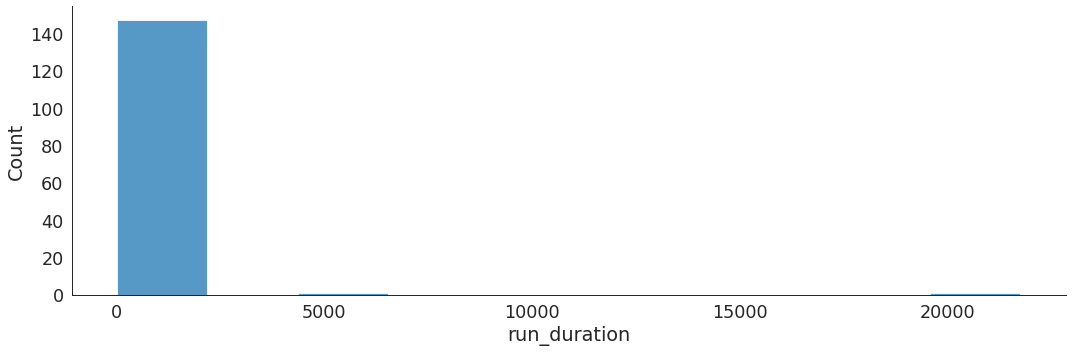

In [5]:
# Distribution of values of run duration
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=failing_df, x="run_duration", kind="hist", bins = 10, aspect = 3)

In [6]:
# create a separate set of values for failing durations
fail_run_duration = failing_df.run_duration.values

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 20.05it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,4.146611e-08,673.066162,-3268.340112,inf,0.610080,8.956203e-54
norm,6.975056e-08,637.379865,-3190.852818,inf,0.515954,2.241915e-37
chi2,1.216998e-07,251.710359,-3102.910759,inf,0.516081,2.142743e-37
exponpow,1.375913e-07,236.941674,-3084.623949,inf,0.572468,9.641635e-47
powerlaw,1.425179e-07,230.506325,-3079.382055,inf,0.506961,5.236382e-36


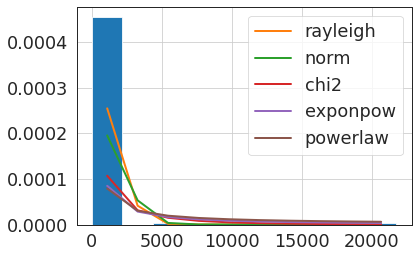

In [7]:
f = Fitter(fail_run_duration,
           distributions=get_common_distributions(), bins =10)
f.fit()
f.summary()

In [8]:
# Find best failing distribution
best_failing_dist = f.get_best(method = 'sumsquare_error')
best_failing_dist

{'rayleigh': {'loc': -1756.2617094293264, 'scale': 1896.3407192245306}}

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 157.74it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,4.146611e-08,673.066162,-3268.340112,inf,0.61008,8.956203e-54


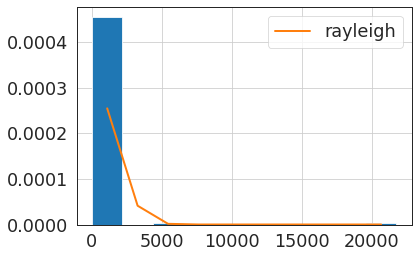

In [9]:
f = Fitter(fail_run_duration,
           distributions=best_failing_dist, bins =10)
f.fit()
f.summary()

In [10]:
f_dist = list(best_failing_dist.keys())[0]

In [11]:
# Calculate the parameters for the failing distribution curve
f_params = f.fitted_param[f_dist]
f_params

(-1756.2617094293264, 1896.3407192245306)

In [12]:
# create a separate set of values for the passing run times.
pass_run_duration = passing_df.run_duration.values

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 19.78it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000411,96.773560,-1509.369992,0.085705,0.063716,0.685521
gamma,0.000499,95.782496,-1485.974772,0.089513,0.087165,0.299179
chi2,0.000499,95.782578,-1485.974709,0.089513,0.087166,0.299170
rayleigh,0.000625,96.497103,-1463.350072,0.149985,0.114928,0.075489
exponpow,0.000973,94.878291,-1404.993485,0.128042,0.145748,0.010460


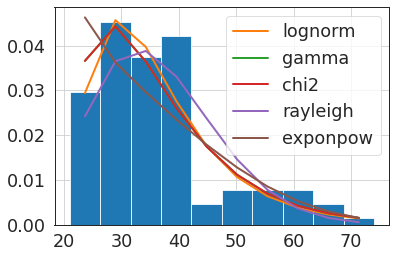

In [13]:
p = Fitter(pass_run_duration,
           distributions=get_common_distributions(), bins =10)
p.fit()
p.summary()

In [14]:
# find the best passing distribution
best_passing_dist = p.get_best(method = 'sumsquare_error')
best_passing_dist

{'lognorm': {'s': 0.4832784330589472,
  'loc': 13.480354258786946,
  'scale': 20.252812158195777}}

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000411,96.77356,-1509.369992,0.085705,0.063716,0.685521


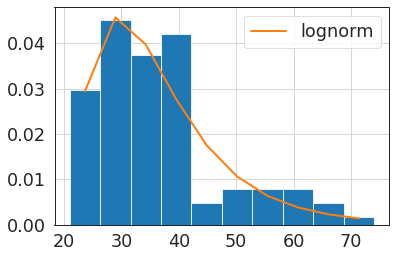

In [15]:
p = Fitter(pass_run_duration,
           distributions=best_passing_dist, bins =10)
p.fit()
p.summary()

In [16]:
p_dist = list(best_passing_dist.keys())[0]

In [17]:
# Calculate the parameters for the passing distribution curve
p_params = p.fitted_param[p_dist]
p_params

(0.4832784330589472, 13.480354258786946, 20.252812158195777)

In [18]:
### Next steps: Caluculate the OSP 

In [19]:
 #TO-do = change this to new methodology and parameters
def optimal_stopping_point(
    best_dist,
    y_std_failing,
    y_failing,
    parameters_failing,
    y_std_passing,
    y_passing,
    parameters_passing,
):
    """
    This function takes the best_distribution,
    failing and passing distributions and parameters
    and returns an optimal stopping point for the test.
    """

    dist = getattr(scipy.stats, best_dist)

    # Obtain the intersection points between the distribution curves
    x, y = intersection(
        y_failing,
        dist.pdf(
            y_std_failing,
            parameters_failing[0],
            parameters_failing[1],
            parameters_failing[2],
        ),
        y_passing,
        dist.pdf(
            y_std_passing,
            parameters_passing[0],
            parameters_passing[1],
            parameters_passing[2],
        ),
    )
    osp = max(x)
    return osp